In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
from google.colab import drive

In [3]:
drive.mount('/content/drive')

path = '/content/drive/My Drive/DSO 530'

Mounted at /content/drive


In [4]:
train_df = pd.read_csv(os.path.join(path,'option_train.csv'),index_col = 'Unnamed: 0')
train_df.head()

,Value,S,K,tau,r,BS
1,348.500,1394.46,1050,0.128767,0.0116,Under
2,149.375,1432.25,1400,0.679452,0.0113,Under
3,294.500,1478.90,1225,0.443836,0.0112,Under
4,3.375,1369.89,1500,0.117808,0.0119,Over
5,84.000,1366.42,1350,0.298630,0.0119,Under


In [5]:
train_df.describe()

,Value,S,K,tau,r
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,140.316869,1426.643916,1370.244000,0.327615,0.011468
std,125.155000,56.051523,172.679107,0.231184,0.000448
min,0.281250,1264.740000,750.000000,0.084932,0.010600
25%,45.750000,1387.670000,1275.000000,0.142466,0.011100
50%,105.125000,1434.320000,1400.000000,0.238356,0.011400
75%,200.406250,1469.440000,1475.000000,0.463014,0.011700
max,685.500000,1527.460000,1995.000000,0.989041,0.012900


In [18]:
train_df['S/K'] = train_df['S']/train_df['K']
train_df['S-K_abs'] = abs(train_df['S']-train_df['K'])
train_df['intrinsic_value'] = train_df.apply(lambda row: max(row['S'] - row['K'], 0), axis=1)
train_df['K*S'] = train_df['S']*train_df['K']
train_df['tau_days'] = train_df['tau'] * 365.25

In [19]:
# Identify numerical columns
numerical = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical

Index(['Value', 'S', 'K', 'tau', 'r', 'S/K', 'S-K_abs', 'intrinsic_value',
       'K*S', 'tau_days'],
      dtype='object')

In [20]:
# Set plot background color
# sns.set_style(rc={'figure.facecolor': 'efefefff','axes.facecolor': 'efefefff'})

# Plot

### Value (C): Current option value

<Axes: xlabel='Value'>

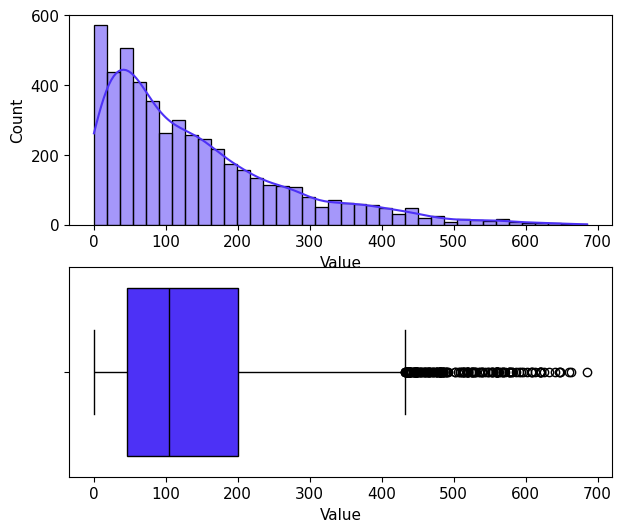

In [21]:
fig, ax = plt.subplots(2,1, figsize=(7,6))
plt.rcParams.update({'font.size': 13})

sns.histplot(data=train_df, x=numerical[0], ax=ax[0], kde=True, color="#4D31F6")
sns.boxplot(data=train_df, x=numerical[0], ax=ax[1], color="#4D31F6", linecolor='black', saturation=1)

### S - Current asset value

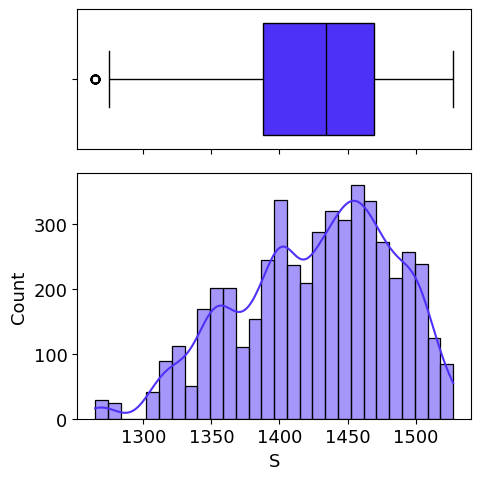

In [22]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [1,1.75]})
plt.rcParams.update({'font.size': 13})

sns.boxplot(data=train_df, x=numerical[1], ax=ax[0], color="#4D31F6", linecolor='black', saturation=1)
sns.histplot(data=train_df, x=numerical[1], ax=ax[1], kde=True, color="#4D31F6")
plt.tight_layout()

### K - Strike price of option

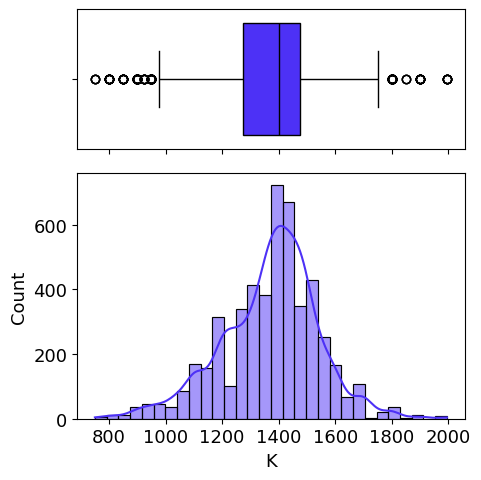

In [23]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [1,1.75]})
plt.rcParams.update({'font.size': 13})

sns.boxplot(data=train_df, x=numerical[2], ax=ax[0], color="#4D31F6", linecolor='black', saturation=1)
sns.histplot(data=train_df, x=numerical[2], ax=ax[1], kde=True, color="#4D31F6", bins=30)
plt.tight_layout()

### tau - Time to maturity (in years)

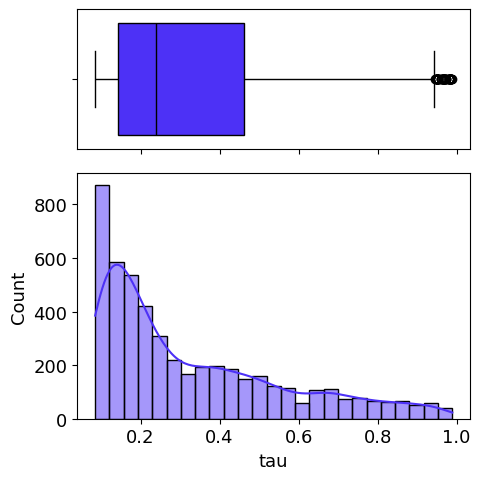

In [24]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [1,1.75]})
plt.rcParams.update({'font.size': 13})

sns.boxplot(data=train_df, x=numerical[3], ax=ax[0], color="#4D31F6", linecolor='black', saturation=1)
sns.histplot(data=train_df, x=numerical[3], ax=ax[1], kde=True, color="#4D31F6")
plt.tight_layout()

### r - Annual interest rate

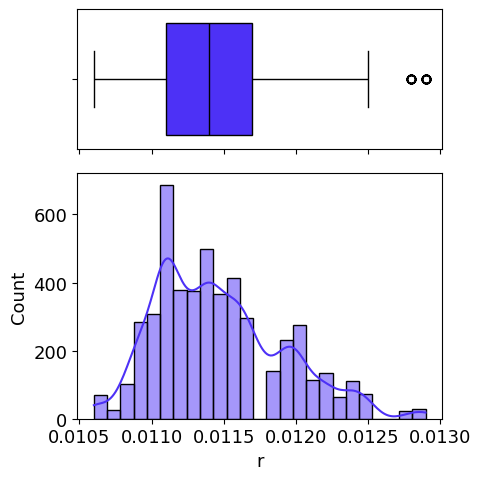

In [25]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [1,1.75]})
plt.rcParams.update({'font.size': 13})

sns.boxplot(data=train_df, x=numerical[4], ax=ax[0], color="#4D31F6", linecolor='black', saturation=1)
sns.histplot(data=train_df, x=numerical[4], ax=ax[1], kde=True, color="#4D31F6", bins=25)
plt.tight_layout()

### Scatterplot

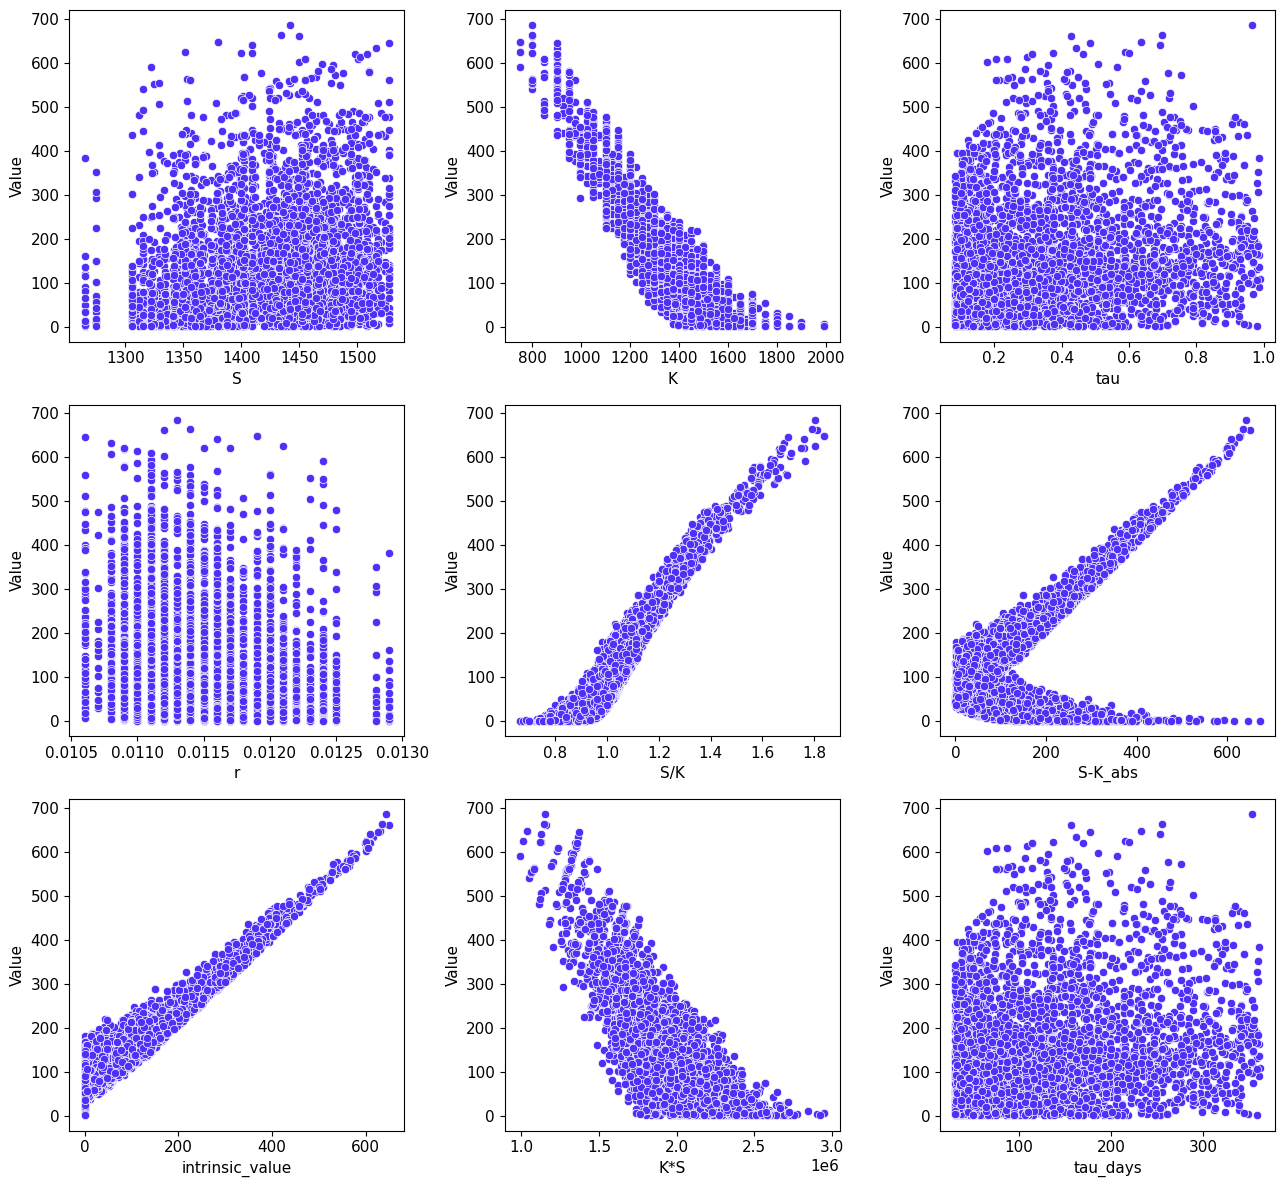

In [38]:
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(3, 3, figsize=(13, 12))

for i, feature in enumerate(numerical[1:]):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=train_df, x=numerical[i+1], y=numerical[0], ax=axes[row, col], color="#4D31F6")

plt.tight_layout()

### Categorical Boxplot

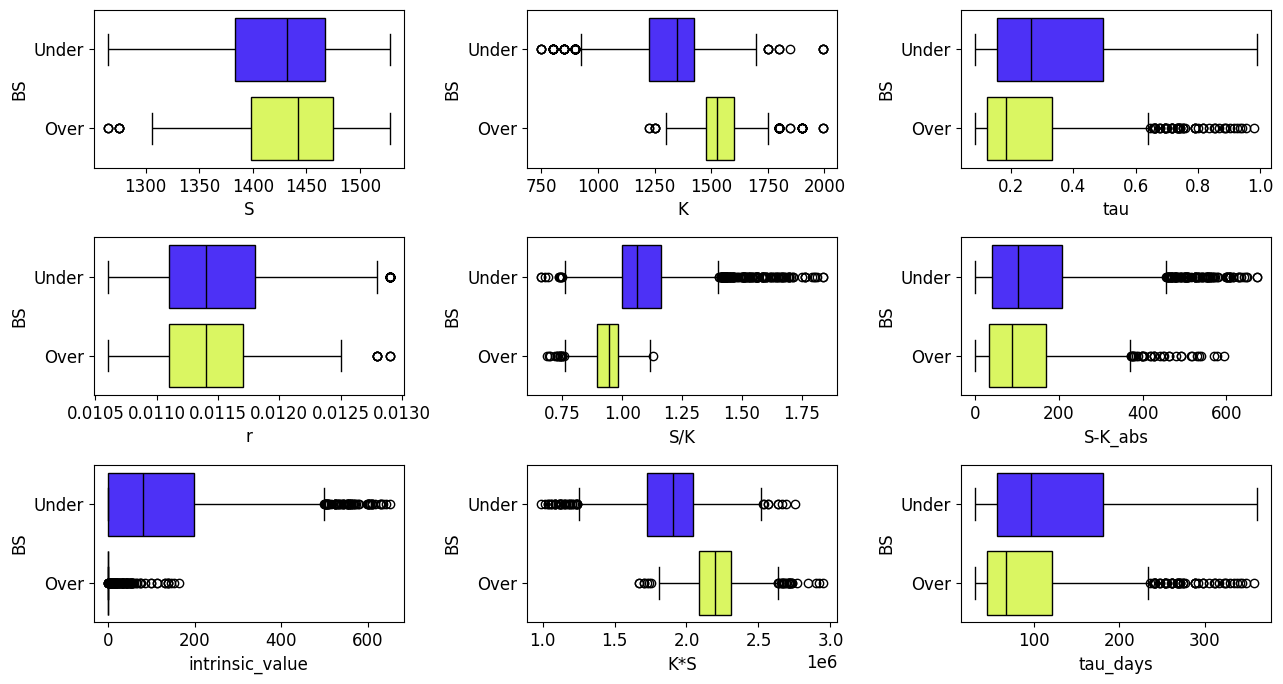

In [46]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(3, 3, figsize=(13, 7))

for i, feature in enumerate(numerical[1:]):
    row = i // 3
    col = i % 3
    sns.boxplot(data=train_df, x=numerical[i+1], y='BS', hue='BS', ax=axes[row, col], palette=["#4D31F6", "#DAF662"], saturation=1, linecolor='black')

plt.tight_layout()

### Correlation Matrix

<Axes: >

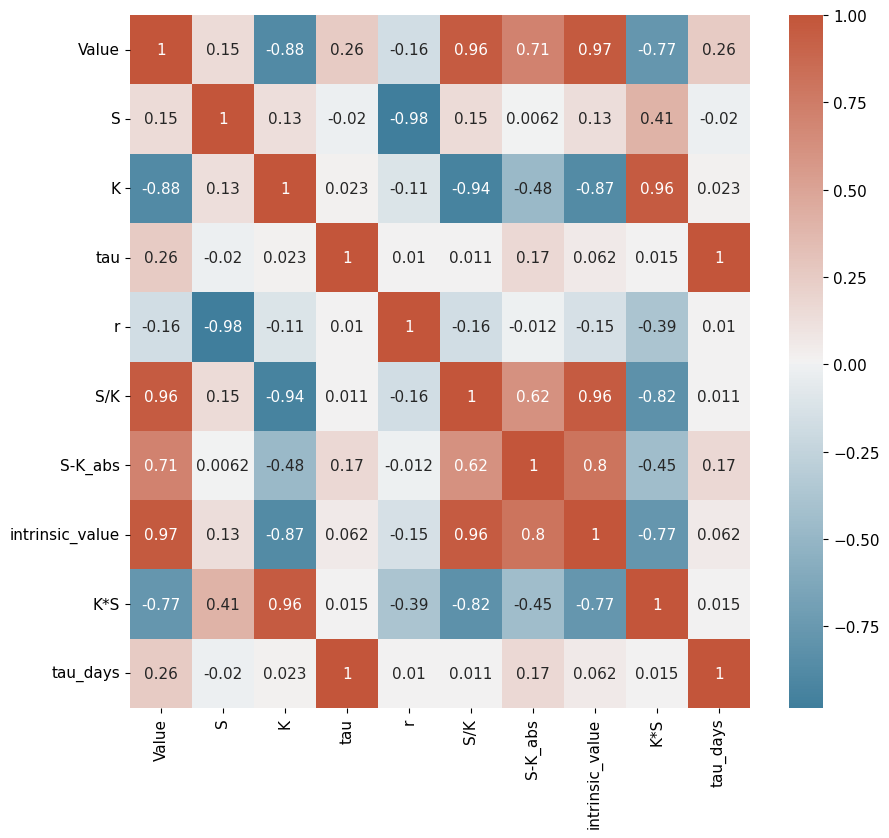

In [32]:
# Compute the correlation matrix
corr = train_df[numerical].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True)

## Feature Creation

In [ ]:
train_df['S/K'] = train_df['S']/train_df['K']
train_df['S-K_abs'] = abs(train_df['S']-train_df['K'])
train_df['intrinsic_value'] = train_df.apply(lambda row: max(row['S'] - row['K'], 0), axis=1)
train_df['K*S'] = train_df['S']*train_df['K']